In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
file_path = '/content/internet_usage.csv'
df = pd.read_csv(file_path)

In [17]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_usage_hours        100 non-null    float64
 1   site_categories_visited  100 non-null    int64  
 2   sessions_per_day         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


(None,
    daily_usage_hours  site_categories_visited  sessions_per_day
 0           9.884957                        2                13
 1           1.023220                        9                 1
 2          10.394205                        9                 3
 3           5.990237                        6                16
 4           3.558451                        4                 4)

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [22]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

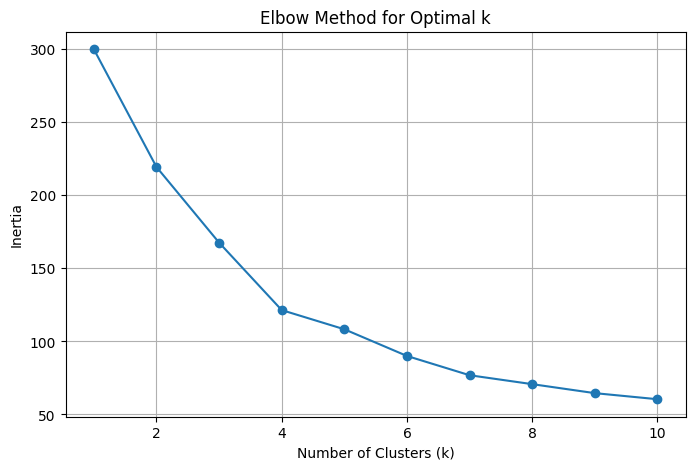

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

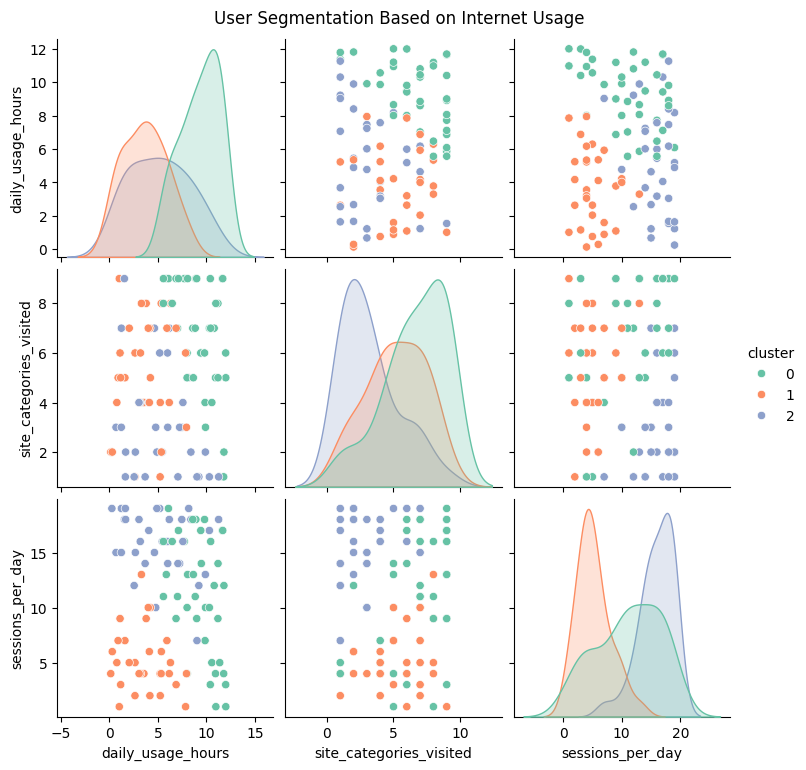

,daily_usage_hours,site_categories_visited,sessions_per_day,cluster
0,9.884957,2,13,2
1,1.023220,9,1,1
2,10.394205,9,3,0
3,5.990237,6,16,2
4,3.558451,4,4,1


In [24]:
import seaborn as sns
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
sns.pairplot(df, hue='cluster', palette='Set2', diag_kind='kde')
plt.suptitle('User Segmentation Based on Internet Usage', y=1.02)
plt.show()

df.head()


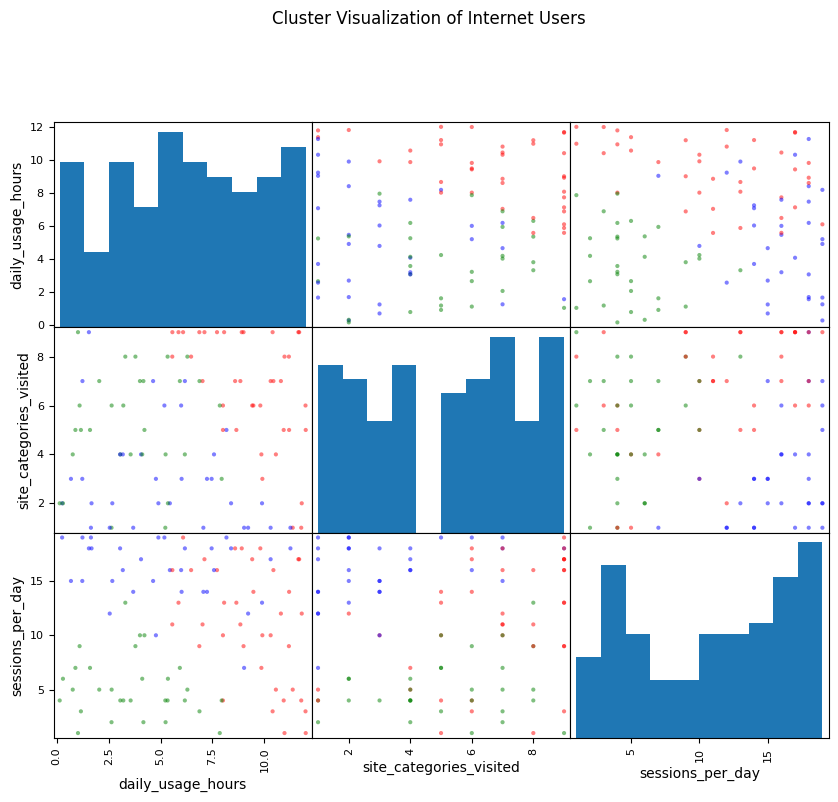

In [25]:
from pandas.plotting import scatter_matrix
features = ['daily_usage_hours', 'site_categories_visited', 'sessions_per_day']
color_map = df['cluster'].map({0: 'red', 1: 'green', 2: 'blue'})

# Scatter matrix for visualizing clusters
scatter_matrix(df[features], figsize=(10, 8), diagonal='hist', color=color_map)
plt.suptitle('Cluster Visualization of Internet Users', y=1.02)
plt.show()
